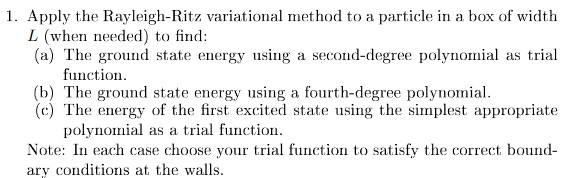

In [5]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
#from scipy.special import hermite, factorial, eval_hermite
from matplotlib.animation import FuncAnimation
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd


style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 2):
    display(Image(filename=f'p_statement/p{i}.jpg'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')

In [6]:
# define symbols
x, L, alpha = sp.symbols('x L alpha', real=True, positive=True)
hbar, m = sp.symbols('hbar m', positive=True)
#part a for trial function
psi_a = x * (L - x)
norm_sq_a = sp.integrate(psi_a**2, (x, 0, L))
N_a_sq = 1 / norm_sq_a
N_a = sp.sqrt(N_a_sq)
psi_a_norm = N_a * psi_a

d2_psi_a = sp.diff(psi_a_norm, x, 2)
H_psi_a = - (hbar**2 / (2*m)) * d2_psi_a
E_a = sp.integrate(psi_a_norm * H_psi_a, (x, 0, L))

print('psi, norm squared, dervativers of psi and H below\n')
display(psi_a, norm_sq_a,N_a,psi_a_norm,d2_psi_a,H_psi_a)
print('The energy value calculated for part a is: \n')
display(E_a)

psi, norm squared, dervativers of psi and H below



x*(L - x)

L**5/30

sqrt(30)/L**(5/2)

sqrt(30)*x*(L - x)/L**(5/2)

-2*sqrt(30)/L**(5/2)

sqrt(30)*hbar**2/(L**(5/2)*m)

The energy value calculated for part a is: 



5*hbar**2/(L**2*m)

In [7]:
psi_b = x * (L - x) * (1 + alpha * x)
norm_sq_b = sp.integrate(psi_b**2, (x, 0, L))
d2_psi_b = sp.diff(psi_b, x, 2)
H_psi_b = - (hbar**2 / (2*m)) * d2_psi_b
numerator_b = sp.integrate(psi_b * H_psi_b, (x, 0, L))
E_b = (numerator_b / norm_sq_b).simplify()
display(E_b)

hbar**2*(14*L**2*alpha**2 + 35*L*alpha + 35)/(L**2*m*(2*L**2*alpha**2 + 7*L*alpha + 7))

In [8]:
#normalization constant N for psi
N_a = sp.symbols('N_a')

#4deg poly
psi_b_full = N_a * x * (L - x) * (1 + alpha * x * (L - x))

#expand squared psi for norm
psi_b_full_sq = psi_b_full**2

#integral for each part
term1 = sp.integrate(x**2 * (L - x)**2, (x, 0, L))
term2 = sp.integrate(2 * alpha * x**3 * (L - x)**3, (x, 0, L))
term3 = sp.integrate(alpha**2 * x**4 * (L - x)**4, (x, 0, L))
norm_integral = term1 + term2 + term3

#energy expectation
d2_psi_b = sp.diff(psi_b_full, x, 2)  #2nd derv for KE
H_psi_b_full = - (hbar**2 / (2 * m)) * d2_psi_b
numerator_b_full = sp.integrate(psi_b_full * H_psi_b_full, (x, 0, L))
E_b_full = numerator_b_full / norm_integral

#simplify
E_b_full_simplified = sp.simplify(E_b_full)
display(E_b_full_simplified)

print('the minimized function is:\n')
#min w/ respect to alpha
alpha_opt = sp.solve(sp.diff(E_b_full_simplified, alpha), alpha)

#get the min energy by subbing optimized alpha
E_b_min = E_b_full_simplified.subs(alpha, alpha_opt[0])

E_b_min_simplified = sp.simplify(E_b_min)
display(E_b_min_simplified)

N_a**2*hbar**2*(6*L**4*alpha**2 + 42*L**2*alpha + 105)/(L**2*m*(L**4*alpha**2 + 9*L**2*alpha + 21))

the minimized function is:



42*N_a**2*hbar**2*(sqrt(133) + 19)/(L**2*m*(11*sqrt(133) + 133))

In [9]:
#1c
psi_c = x * (L - x) * (x - L/2)
norm_sq_c = sp.integrate(psi_c**2, (x, 0, L))
N_c_sq = 1 / norm_sq_c
N_c = sp.sqrt(N_c_sq)
psi_c_norm = N_c * psi_c

d2_psi_c = sp.diff(psi_c_norm, x, 2)
H_psi_c = - (hbar**2 / (2*m)) * d2_psi_c
E_c = sp.integrate(psi_c_norm * H_psi_c, (x, 0, L))

E_c_simplified = sp.simplify(E_c)
display(d2_psi_c,H_psi_c,E_c,psi_c_norm)

4*sqrt(210)*(3*L/2 - 3*x)/L**(7/2)

-2*sqrt(210)*hbar**2*(3*L/2 - 3*x)/(L**(7/2)*m)

21*hbar**2/(L**2*m)

2*sqrt(210)*x*(-L/2 + x)*(L - x)/L**(7/2)


variational bound on ground state energy: 39.9820 ħ²/(ma²)
exact energy is 39.9819 ħ²/(ma²)
The delta of the two is: 0.0000545 ħ²/(ma²)
numerical norm of ψ_opt = 1.000000


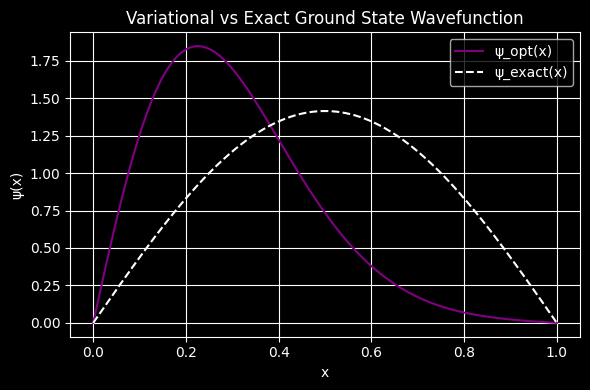

In [10]:
N = 3
c = sp.symbols(f'c0:{N}')
cs = sp.symbols(f'c0:{N}_conj')

H = sp.IndexedBase('H')
ε = sp.Symbol('ε', real=True)

#ε=⟨ψ|H|ψ⟩/⟨ψ|ψ⟩
numerator = sum(cs[m] * H[m, n] * c[n] for m in range(N) for n in range(N))
denominator = sum(cs[n] * c[n] for n in range(N))
epsilon_expr = numerator / denominator


#2a derivative w/respet to c*_j
j = 1
deriv = sp.diff(epsilon_expr, cs[j])
deriv_cj = sp.diff(epsilon_expr, c[j])


#symbolic basis functions φ_n(x)=sqrt(2/a)*sin(nπx/a)
x, a, V0 = sp.symbols('x a V0', real=True, positive=True)
def phi(n):
    return sp.sqrt(2/a) * sp.sin(n * sp.pi * x / a)

def Tmn(m):
    n_val = m + 1
    return 0.5 * (n_val**2 * pi**2)  #in units of ħ²/(ma²)

def Vmn(m, n):
    φm = phi(m+1)
    φn = phi(n+1)
    integrand = φm * V0 * x/a * φn
    return sp.simplify(sp.integrate(integrand, (x, 0, a)))

#full matrix
N_num = 10
Hmat = np.zeros((N_num, N_num))
a_val = 1.0
V0_val = 100.0

for m in range(N_num):
    for n in range(N_num):
        if m == n:
            T = 0.5 * ((m+1)**2 * sp.pi**2)
        else:
            T = 0
        #V_mn analytically
        if (m + n) % 2 == 1:
            V = (2 * V0_val / sp.pi**2) * (1/((m+n+2)**2) - 1/((m-n)**2 if m != n else np.inf))
        else:
            V = 0.0
        if m == n:
            V += V0_val / 2
        Hmat[m, n] = T + V

#diagonalize
eigvals, eigvecs = np.linalg.eigh(Hmat)
ground_energy = eigvals[0]
ground_state_vec = eigvecs[:, 0]

exact_energy = 39.9819
print(f'\nvariational bound on ground state energy: {ground_energy:.4f} ħ²/(ma²)')
print(f'exact energy is {exact_energy} ħ²/(ma²)')
delta = np.abs(ground_energy - exact_energy)
print(f'The delta of the two is: {delta:.7f} ħ²/(ma²)')

#plot optimized ψ(x)
x_vals = np.linspace(0, 1, 500)
psi_vals = np.zeros_like(x_vals)
for n in range(N_num):
    psi_vals += ground_state_vec[n] * np.sqrt(2) * np.sin((n+1)*np.pi*x_vals)

norm = np.trapezoid(psi_vals**2, x_vals)
print(f'numerical norm of ψ_opt = {norm:.6f}')

#add exact ground state for comparison
psi_exact = np.sqrt(2) * np.sin(np.pi * x_vals)

plt.figure(figsize=(6,4))
plt.plot(x_vals, psi_vals, label='ψ_opt(x)', color='purple')
plt.plot(x_vals, psi_exact, label='ψ_exact(x)', color='white', linestyle='--')
plt.title('Variational vs Exact Ground State Wavefunction')
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
